In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import ssl
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB

In [2]:
hdr = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.11 (KHTML, like Gecko) Chrome/23.0.1271.64 Safari/537.11',
       'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8',
       'Accept-Charset': 'ISO-8859-1,utf-8;q=0.7,*;q=0.3',
       'Accept-Encoding': 'none',
       'Accept-Language': 'en-US,en;q=0.8',
       'Connection': 'keep-alive'}

In [56]:
ssl._create_default_https_context = ssl._create_unverified_context
topic_url_dict = {
    "Climate Action": [
        "https://medium.com/tag/climate-action/recommended",
        "https://medium.com/tag/climate-change/recommended",
        "https://medium.com/tag/carbon-offset/recommended",
        "https://medium.com/tag/global-warming/recommended",
        "https://medium.com/tag/biodiversity/recommended",
        "https://medium.com/tag/environment/recommended",
        "https://medium.com/tag/energy/recommended",
        "https://medium.com/tag/ice-caps",
        "https://medium.com/tag/eco-friendly",
        "https://medium.com/tag/energy/recommended",

    ]
}
for topic, urls in topic_url_dict.items(): 
    rows_list = []
    print(f"Topic: {topic}\n")
    for url in urls:
        req = urllib.request.Request(url, headers=hdr)
        
        html_content = urlopen(req).read()
        # Create a BeautifulSoup object to parse the HTML
        soup = BeautifulSoup(html_content, "html.parser")
        # Find all the h2 elements with the specified class
        h2_elements = soup.find_all("h2", class_='be kf kg kh ki kj kk kl km kn ko kp is it kq kr iu ks kt ku kv kw kx ky kz la lb ig if jp jr jt bj')
        # Iterate over the h2 elements and extract the title and writer
         
        for index in range(len(h2_elements)):
            h2_element = h2_elements[index]
            writer_element = h2_element.find_next()
            
            if writer_element:
                writer = writer_element.get_text()
            else:
                writer = "Unknown"
            title = h2_element.get_text()
            rows_list.append({"title": title, "topic": topic})
            #news_df = news_df.append({"title": title, "topic": topic}, ignore_index=True)
            print(f"Title: {title}\n") 
    news_df = pd.DataFrame(rows_list)
    news_df.to_csv(f"{topic}_news_data.csv") 
    news_df.info()

Topic: Climate Action

Title: Rethinking Solutionism: Why We Need More Awareness and Sensitivity in Climate Action

Title: Why I Willingly Gave A Third Party Remote Access to My Home Battery

Title: The Colorado River Basin Is Disappearing Into Fast Food Menus

Title: Why Toniic members invested in Fervo Energy’s $244M Series D

Title: Are Christian Values At Odds With Climate Change Activism?

Title: Too Many Other Problems To Care About Climate Change?

Title: Breakdown (The Intern)

Title: Why Isn’t Everyone Talking About Sustainable Bioeconomies?

Title: Think Scientists Disagree on Climate Change? Think Again!

Title: Rethinking wind power’s towers and turbines

Title: Way Past W.T.F.

Title: Where did the water go?

Title: Why Aren’t We All Starving?

Title: Why Are Emperor Penguin Chicks Leaping Off 50-Foot Cliffs in Antarctica?

Title: Are Christian Values At Odds With Climate Change Activism?

Title: It’s Official: March Was the 10th Straight Month to be Hottest on Record

Tit

In [3]:
import ssl
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context

topic_url_dict = {
    "Climate Action": [
        "https://medium.com/tag/climate-action/recommended",
        "https://medium.com/tag/climate-change/recommended",
        "https://medium.com/tag/carbon/recommended",
        "https://medium.com/tag/emissions/recommended",
        "https://medium.com/tag/greenhouse-gases/recommended",
        "https://medium.com/tag/methane/recommended",
        "https://medium.com/tag/carbon-dioxide/recommended",
        "https://medium.com/tag/global-warming/recommended",
        "https://medium.com/tag/temperature-rise/recommended",
        "https://medium.com/tag/ice-melt/recommended",
        "https://medium.com/tag/sea-level-rise/recommended",
        "https://medium.com/tag/climate-models/recommended",
        "https://medium.com/tag/ozone-layer/recommended",
        "https://medium.com/tag/drought/recommended",
        "https://medium.com/tag/floods/recommended",
        "https://medium.com/tag/extreme-weather/recommended",
        "https://medium.com/tag/heatwaves/recommended",
        "https://medium.com/tag/hurricanes/recommended",
        "https://medium.com/tag/wildfires/recommended",
        "https://medium.com/tag/biodiversity-loss/recommended",
        "https://medium.com/tag/deforestation/recommended",
        "https://medium.com/tag/desertification/recommended",
        "https://medium.com/tag/ecosystem-disruption/recommended",
        "https://medium.com/tag/habitat-loss/recommended",
        "https://medium.com/tag/renewable-energy/recommended",
        "https://medium.com/tag/solar-power/recommended",
        "https://medium.com/tag/wind-energy/recommended",
        "https://medium.com/tag/hydroelectric/recommended",
        "https://medium.com/tag/biomass/recommended",
        "https://medium.com/tag/geothermal/recommended",
        "https://medium.com/tag/energy-efficiency/recommended",
        "https://medium.com/tag/sustainability/recommended",
        "https://medium.com/tag/conservation/recommended",
        "https://medium.com/tag/recycling/recommended",
        "https://medium.com/tag/carbon-footprint/recommended",
        "https://medium.com/tag/carbon-tax/recommended",
        "https://medium.com/tag/cap-and-trade/recommended",
        "https://medium.com/tag/emissions-trading/recommended",
        "https://medium.com/tag/climate-policy/recommended",
        "https://medium.com/tag/international-agreements/recommended",
        "https://medium.com/tag/paris-agreement/recommended",
        "https://medium.com/tag/kyoto-protocol/recommended",
        "https://medium.com/tag/afforestation/recommended",
        "https://medium.com/tag/reforestation/recommended",
        "https://medium.com/tag/carbon-sequestration/recommended",
        "https://medium.com/tag/green-infrastructure/recommended",
        "https://medium.com/tag/urban-planning/recommended",
        "https://medium.com/tag/climate-resilience/recommended",
        "https://medium.com/tag/adaptive-capacity/recommended",
        "https://medium.com/tag/mitigation-strategies/recommended",
        "https://medium.com/tag/transition-towns/recommended",
        "https://medium.com/tag/climate-adaptation/recommended",
        "https://medium.com/tag/disaster-preparedness/recommended",
        "https://medium.com/tag/environmental-restoration/recommended",
        "https://medium.com/tag/activism/recommended",
        "https://medium.com/tag/climate-march/recommended",
        "https://medium.com/tag/eco-friendly/recommended",
        "https://medium.com/tag/sustainable-practices/recommended",
        "https://medium.com/tag/green-living/recommended",
        "https://medium.com/tag/zero-waste/recommended",
        "https://medium.com/tag/circular-economy/recommended",
        "https://medium.com/tag/corporate-responsibility/recommended",
        "https://medium.com/tag/environmental-justice/recommended",
        "https://medium.com/tag/grassroots-movements/recommended",

    ]
}

hdr = {'User-Agent': 'Mozilla/5.0'}

for topic, urls in topic_url_dict.items():
    rows_list = []
    print(f"Topic: {topic}\n")
    for url in urls:
        req = urllib.request.Request(url, headers=hdr)
        html_content = urllib.request.urlopen(req).read()
        soup = BeautifulSoup(html_content, "html.parser")
        
        # Update your class to specifically target the divs wrapping the articles
        article_divs = soup.find_all("div", class_="jv jw jx jy jz ka kb kc kd ke")
        
        for div in article_divs:
            a_tag = div.find('a', class_='af ag ah ai aj ak al am an ao ap aq ar as at')
            if a_tag:
                article_url = a_tag['href']
                title = div.find('h2').get_text() if div.find('h2') else "No title found"
                summary = div.find('h3').get_text() if div.find('h3') else "No summary available"

                rows_list.append({
                    "title": title,
                    "url": "https://medium.com" + article_url,  # Ensure the URL is complete
                    "summary": summary.strip(),
                    "topic": topic
                })
                print(f"Title: {title}, URL: {article_url}\n")

    news_df = pd.DataFrame(rows_list)
    news_df.to_csv(f"{topic}_news_data.csv")
    news_df.info()


Topic: Climate Action

Title: The Sun Has Engulfed India, URL: /the-new-climate/the-sun-has-engulfed-india-4c0f8543144c?source=tag_recommended_feed---------0-84----------climate_action----------66fb9c77_7a0c_43a5_bb5a_77b0216b28a0-------

Title: What if Climate Change Predictions Don’t Come True?, URL: /the-new-climate/what-if-climate-change-predictions-dont-come-true-8901295a03a0?source=tag_recommended_feed---------1-107----------climate_action----------66fb9c77_7a0c_43a5_bb5a_77b0216b28a0-------

Title: How to Fortify Buildings Against Climate Change, URL: /@wesodonnell/fortifying-buildings-against-climate-change-and-an-uncertain-future-f65e42949ff6?source=tag_recommended_feed---------2-85----------climate_action----------66fb9c77_7a0c_43a5_bb5a_77b0216b28a0-------

Title: You Really Need to Know What’s Withheld From You, URL: /the-shortform/you-really-need-to-know-whats-withheld-from-you-dff6c0c3934d?source=tag_recommended_feed---------3-84----------climate_action----------66fb9c77_

In [22]:
import pandas as pd
news_df = pd.read_csv("Climate Action_news_data.csv")
news_df.drop(columns=["Unnamed: 0", "url","summary"], inplace=True)

In [4]:
news_df.drop(columns=["Unnamed: 0"], inplace=True)

KeyError: "['Unnamed: 0'] not found in axis"

In [23]:
news_df

,title,topic
0,Rethinking Solutionism: Why We Need More Aware...,Climate Action
1,Why I Willingly Gave A Third Party Remote Acce...,Climate Action
2,The Colorado River Basin Is Disappearing Into ...,Climate Action
3,Why Toniic members invested in Fervo Energy’s ...,Climate Action
4,Are Christian Values At Odds With Climate Chan...,Climate Action
...,...,...
497,The Urban Highway that Started it All: Examini...,Climate Action
498,Climate Superfund Laws: Recovering the Cost of...,Climate Action
499,Rest is Resistance: Combating Insomnia’s Racis...,Climate Action
500,Suburbs: The Great American Ponzi Scheme,Climate Action


In [70]:

import ssl
import urllib.request
from bs4 import BeautifulSoup
import pandas as pd

ssl._create_default_https_context = ssl._create_unverified_context

topic_url_dict = {
    "Not Climate Action": [
        "https://medium.com/tag/movies/recommended",
            "https://medium.com/tag/television/recommended",
            "https://medium.com/tag/music/recommended",
            "https://medium.com/tag/video-games/recommended",
            "https://medium.com/tag/streaming/recommended",
            "https://medium.com/tag/concerts/recommended",
            "https://medium.com/tag/actors/recommended",
            "https://medium.com/tag/directors/recommended",
            "https://medium.com/tag/albums/recommended",
            "https://medium.com/tag/awards/recommended",
            "https://medium.com/tag/smartphones/recommended",
            "https://medium.com/tag/computers/recommended",
            "https://medium.com/tag/recipes/recommended",
            "https://medium.com/tag/restaurants/recommended",
            "https://medium.com/tag/cocktails/recommended",
            "https://medium.com/tag/coffee/recommended",
            "https://medium.com/tag/vegetarian/recommended",
            "https://medium.com/tag/baking/recommended",
            "https://medium.com/tag/grilling/recommended",
            "https://medium.com/tag/wine/recommended",
            "https://medium.com/tag/craft-beer/recommended",
            "https://medium.com/tag/cooking-tips/recommended",
            "https://medium.com/tag/football/recommended",
            "https://medium.com/tag/basketball/recommended",
            "https://medium.com/tag/baseball/recommended",
            "https://medium.com/tag/olympics/recommended",
            "https://medium.com/tag/soccer/recommended",
            "https://medium.com/tag/tennis/recommended",
            "https://medium.com/tag/golf/recommended",
            "https://medium.com/tag/marathons/recommended",
            "https://medium.com/tag/boxing/recommended",
            "https://medium.com/tag/cycling/recommended",
            "https://medium.com/tag/yoga/recommended",
            "https://medium.com/tag/meditation/recommended",
            "https://medium.com/tag/nutrition/recommended",
            "https://medium.com/tag/diets/recommended",
            "https://medium.com/tag/exercise/recommended",
            "https://medium.com/tag/mental-health/recommended",
            "https://medium.com/tag/supplements/recommended",
            "https://medium.com/tag/weight-loss/recommended",
            "https://medium.com/tag/personal-training/recommended",
            "https://medium.com/tag/wellness-trends/recommended",
            "https://medium.com/tag/stocks/recommended",
            "https://medium.com/tag/investing/recommended",
            "https://medium.com/tag/banking/recommended",
            "https://medium.com/tag/real-estate/recommended",
            "https://medium.com/tag/cryptocurrency/recommended",
            "https://medium.com/tag/budgeting/recommended",
            "https://medium.com/tag/taxes/recommended",
            "https://medium.com/tag/retirement-planning/recommended",
            "https://medium.com/tag/insurance/recommended",
            "https://medium.com/tag/loans/recommended",
            "https://medium.com/tag/trends/recommended",
            "https://medium.com/tag/designers/recommended",
            "https://medium.com/tag/runway/recommended",
            "https://medium.com/tag/shoes/recommended",
            "https://medium.com/tag/accessories/recommended",
            "https://medium.com/tag/jewelry/recommended",
            "https://medium.com/tag/haute-couture/recommended",
            "https://medium.com/tag/street-style/recommended",
            "https://medium.com/tag/fashion-weeks/recommended",
            "https://medium.com/tag/vintage-clothing/recommended",
            "https://medium.com/tag/destinations/recommended",
            "https://medium.com/tag/hotels/recommended",
            "https://medium.com/tag/airlines/recommended",
            "https://medium.com/tag/itineraries/recommended",
            "https://medium.com/tag/travel-gear/recommended",
            "https://medium.com/tag/adventure-travel",

    ]
}


hdr = {'User-Agent': 'Mozilla/5.0'}

for topic, urls in topic_url_dict.items():
    rows_list = []
    print(f"Topic: {topic}\n")
    for url in urls:
        req = urllib.request.Request(url, headers=hdr)
        html_content = urllib.request.urlopen(req).read()
        soup = BeautifulSoup(html_content, "html.parser")
        
        # Update your class to specifically target the divs wrapping the articles
        article_divs = soup.find_all("div", class_="jv jw jx jy jz ka kb kc kd ke")
        
        for div in article_divs:
            a_tag = div.find('a', class_='af ag ah ai aj ak al am an ao ap aq ar as at')
            if a_tag:
                article_url = a_tag['href']
                title = div.find('h2').get_text() if div.find('h2') else "No title found"
                summary = div.find('h3').get_text() if div.find('h3') else "No summary available"

                rows_list.append({
                    "title": title,
                    "url": "https://medium.com" + article_url,  # Ensure the URL is complete
                    "summary": summary.strip(),
                    "topic": topic
                })
                print(f"Title: {title}, URL: {article_url}\n")

    news_df = pd.DataFrame(rows_list)
    news_df.to_csv(f"unrelated_news_data.csv")
    news_df.info()


Topic: Not Climate Action

Title: Why SanimaWaale?, URL: /@vijeta_46176/why-sanimawaale-cdb9cce5e6db?source=tag_recommended_feed---------0-84----------movies----------fa313eea_b0d5_4dd5_b68f_8d0626a7c0a3-------

Title: The 10 Most ‘Totally Traumatizing’ PG-Rated Movies That Generation X Watched as Kids, URL: /fan-fare/the-10-most-totally-traumatizing-pg-rated-movies-that-generation-x-watched-as-kids-af861d2ab6fa?source=tag_recommended_feed---------1-107----------movies----------fa313eea_b0d5_4dd5_b68f_8d0626a7c0a3-------

Title: My Favourite Underrated Sci-Fi Film: Upgrade, URL: /fan-fare/my-favourite-underrated-sci-fi-film-upgrade-673635bc11c7?source=tag_recommended_feed---------2-85----------movies----------fa313eea_b0d5_4dd5_b68f_8d0626a7c0a3-------

Title: ‘Civil War’ Has More To Say About Journalism Than US Politics, URL: /the-wide-shot/civil-war-has-more-to-say-about-journalism-than-us-politics-e8b390ba2c3e?source=tag_recommended_feed---------3-107----------movies----------fa313e

In [24]:
unrelated_df = pd.read_csv("unrelated_news_data.csv")
unrelated_df.drop(columns=["Unnamed: 0", "url","summary"], inplace=True)

In [25]:
unrelated_df

,title,topic
0,Why SanimaWaale?,Not Climate Action
1,The 10 Most ‘Totally Traumatizing’ PG-Rated Mo...,Not Climate Action
2,My Favourite Underrated Sci-Fi Film: Upgrade,Not Climate Action
3,‘Civil War’ Has More To Say About Journalism T...,Not Climate Action
4,The Haunting Journey of William Peter Blatty,Not Climate Action
...,...,...
475,Common Questions About TSA Approved Luggage Locks,Not Climate Action
476,Aer Day Sling 3: A Review,Not Climate Action
477,Aer Tech Pack Review,Not Climate Action
478,Choosing the Perfect Travel Gear for Your Next...,Not Climate Action


In [26]:
df = pd.concat([news_df, unrelated_df], ignore_index=True)  
df

,title,topic
0,Rethinking Solutionism: Why We Need More Aware...,Climate Action
1,Why I Willingly Gave A Third Party Remote Acce...,Climate Action
2,The Colorado River Basin Is Disappearing Into ...,Climate Action
3,Why Toniic members invested in Fervo Energy’s ...,Climate Action
4,Are Christian Values At Odds With Climate Chan...,Climate Action
...,...,...
977,Common Questions About TSA Approved Luggage Locks,Not Climate Action
978,Aer Day Sling 3: A Review,Not Climate Action
979,Aer Tech Pack Review,Not Climate Action
980,Choosing the Perfect Travel Gear for Your Next...,Not Climate Action


In [9]:
df = pd.get_dummies(df, columns=["topic"])
df

,title,topic_Climate Action,topic_Not Climate Action
0,Rethinking Solutionism: Why We Need More Aware...,True,False
1,Why I Willingly Gave A Third Party Remote Acce...,True,False
2,The Colorado River Basin Is Disappearing Into ...,True,False
3,Why Toniic members invested in Fervo Energy’s ...,True,False
4,Are Christian Values At Odds With Climate Chan...,True,False
...,...,...,...
977,Common Questions About TSA Approved Luggage Locks,False,True
978,Aer Day Sling 3: A Review,False,True
979,Aer Tech Pack Review,False,True
980,Choosing the Perfect Travel Gear for Your Next...,False,True


In [28]:
# Check Shape of the dataset before handling duplicates
print("Shape of the dataset before handling duplicates: ", df.shape) 

# Drop duplicate rows if there is any duplicate row
df = df.drop_duplicates()

# Check Shape of the dataset after handling duplicates
print("Shape of the dataset after handling duplicates: ", df.shape)

Shape of the dataset before handling duplicates:  (959, 2)
Shape of the dataset after handling duplicates:  (959, 2)


In [29]:
import nltk
# Perform text preprocessing 
nltk.download("stopwords")
nltk.download('wordnet')

stop_words = set(stopwords.words("english"))
stemmer = SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yuvvvvv/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/yuvvvvv/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
def preprocess_text(text):
    # Convert to lowercase 
    text = text.lower()
    
    # Remove noise: special characters, symbols, formatting tags
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text) 
        
    # Tokenization
    tokens = nltk.word_tokenize(text)
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    
    tokens = [token for token in tokens if token not in stop_words]
    
    # Handling abbreviations
    # Replace common abbreviations with their expanded forms 
    # Add more abbreviations as needed
    abbreviations = {
        "dr.": "doctor",
        "mr.": "mister",
        "mrs.": "missus"
    }
    
    tokens = [abbreviations.get(token, token) for token in tokens]
    
    # Removing redundant information
    # Remove consecutive duplicate tokens
    tokens = [token for i, token in enumerate(tokens) if i == 0 or token !=tokens[i-1]]
    
    # Handling capitalization
    # Convert all words to title case
    tokens = [token.title() for token in tokens]
    
    # Handling non-textual elements
    # Remove numbers and placeholders for non-textual elements 
    tokens = [token for token in tokens if not token.isdigit()]
    
    # Stemming
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    # Combine stemmed and lemmatized tokens
    combined_tokens = [stemmed + "/" + lemmatized for stemmed, lemmatized in zip(stemmed_tokens, lemmatized_tokens)]
    
    # Join tokens back to a single string
    preprocessed_text_combined = " ".join(combined_tokens)
    return preprocessed_text_combined

In [31]:
df['title_combined'] = df['title'].apply(preprocess_text)

# Display the updated DataFrame
df.head()

,title,topic,title_combined
0,Rethinking Solutionism: Why We Need More Aware...,Climate Action,rethink/Rethinking solution/Solutionism need/N...
1,Why I Willingly Gave A Third Party Remote Acce...,Climate Action,willingli/Willingly gave/Gave third/Third part...
2,The Colorado River Basin Is Disappearing Into ...,Climate Action,colorado/Colorado river/River basin/Basin disa...
3,Why Toniic members invested in Fervo Energy’s ...,Climate Action,toniic/Toniic member/Members invest/Invested f...
4,Are Christian Values At Odds With Climate Chan...,Climate Action,christian/Christian valu/Values odd/Odds clima...


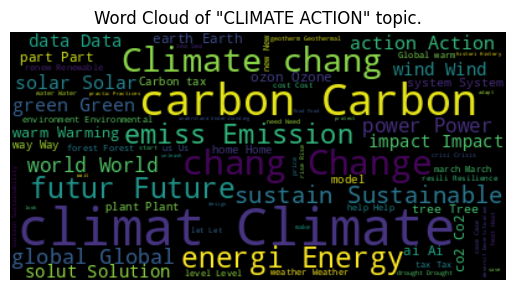

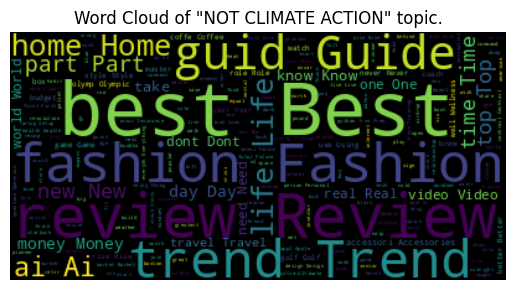

In [32]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt
# Iterate over unique topics in the DataFrame

for topic in df["topic"].unique():
    # Get the preprocessed titles for the current topic and join them into a single string
    titles = df[df["topic"] == topic]["title_combined"].tolist()
    text = " ".join(titles)
    
    # Generate the word cloud for the current topic
    wordcloud = WordCloud().generate(text)
    
    # Display the word cloud
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    
    # Set the title of the plot
    plt.title(f'Word Cloud of "{topic.upper()}" topic.')
    
    # Show the plot
    plt.show()

In [34]:
#convert topic to 1 and 0, 1 for being climate action and 0 for not being climate action
df['topic'] = df['topic'].apply(lambda x: 1 if x == "Climate Action" else 0)
df

,title,topic,title_combined
0,Rethinking Solutionism: Why We Need More Aware...,1,rethink/Rethinking solution/Solutionism need/N...
1,Why I Willingly Gave A Third Party Remote Acce...,1,willingli/Willingly gave/Gave third/Third part...
2,The Colorado River Basin Is Disappearing Into ...,1,colorado/Colorado river/River basin/Basin disa...
3,Why Toniic members invested in Fervo Energy’s ...,1,toniic/Toniic member/Members invest/Invested f...
4,Are Christian Values At Odds With Climate Chan...,1,christian/Christian valu/Values odd/Odds clima...
...,...,...,...
977,Common Questions About TSA Approved Luggage Locks,0,common/Common question/Questions tsa/Tsa appro...
978,Aer Day Sling 3: A Review,0,aer/Aer day/Day sling/Sling review/Review
979,Aer Tech Pack Review,0,aer/Aer tech/Tech pack/Pack review/Review
980,Choosing the Perfect Travel Gear for Your Next...,0,choos/Choosing perfect/Perfect travel/Travel g...


In [36]:
df.to_csv('training_climate_data.csv', index=False) 

In [35]:
X = df["title_combined"]
y = df["topic"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
#using a multinomial naive bayes classifier

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('clf', MultinomialNB())
])

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train) 

#run cross validation on the training set to test for overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("Cross-validation scores: ", scores)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

Cross-validation scores:  [0.81818182 0.76623377 0.76623377 0.74025974 0.67532468 0.85714286
 0.72727273 0.80263158 0.81578947 0.75      ]
              precision    recall  f1-score   support

           0       0.90      0.70      0.78       105
           1       0.71      0.91      0.80        87

    accuracy                           0.79       192
   macro avg       0.81      0.80      0.79       192
weighted avg       0.82      0.79      0.79       192



In [115]:
# Calculate the training accuracy
train_accuracy = pipeline.score(X_train, y_train)
print('Training Accuracy:', train_accuracy)

# Calculate the test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)

Training Accuracy: 0.9960886571056062
Test Accuracy: 0.7916666666666666


In [ ]:
#this model is not capturing as many words as it can related to climate change: con
#this model is not identifying the words that are not climate action related as climate related: pro

In [ ]:
#precision - predicted positives/ total positives
#recall - false positive rate
#f1-score - harmonic mean of precision and recall
#support - number of occurrences of each class in y_true
#accuracy - number of correct predictions made by the model over all kinds predictions made

In [118]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer 
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier,AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_predict

In [127]:
rf_classifier = RandomForestClassifier()
svm_classifier = SVC()
gb_classifier = GradientBoostingClassifier()
dl_classifier = MLPClassifier()

# Create a voting classifier
voting_classifier = VotingClassifier(
    estimators=[
        ('rf', rf_classifier),
        ('svm', svm_classifier),
        ('gb', gb_classifier),
        ('dl', dl_classifier)
],
voting='hard') # Use majority voting

# Create the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(preprocessor=preprocess_text)),
    ('classifier', voting_classifier),
])

#run cross validation on the training set to test for overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipeline, X_train, y_train, cv=10)
print("Cross-validation scores: ", scores)

# Fit the pipeline to the training data
pipeline.fit(X_train, y_train) # Predict on the test data

y_pred = pipeline.predict(X_test)
# Evaluate the model
print(classification_report(y_test, y_pred))

Cross-validation scores:  [0.75324675 0.81818182 0.71428571 0.62337662 0.83116883 0.81818182
 0.76623377 0.77631579 0.76315789 0.68421053]
              precision    recall  f1-score   support

           0       0.75      0.96      0.85       105
           1       0.93      0.62      0.74        87

    accuracy                           0.81       192
   macro avg       0.84      0.79      0.80       192
weighted avg       0.83      0.81      0.80       192



In [121]:
# Calculate the training accuracy
train_accuracy = pipeline.score(X_train, y_train)
print('Training Accuracy:', train_accuracy)

# Calculate the test accuracy
test_accuracy = pipeline.score(X_test, y_test)
print('Test Accuracy:', test_accuracy)
#almost same, it is predicting non-climate action related words as climate action related words
#thus, rn Naive Bayes > Voting Classifier

Training Accuracy: 0.9986962190352021
Test Accuracy: 0.8020833333333334


In [123]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.0/258.0 kB 9.6 MB/s eta 0:00:00


In [136]:
df = pd.DataFrame([X,y])
df = df.T
df

,title_combined,topic
0,rethink/Rethinking solution/Solutionism need/N...,1
1,willingli/Willingly gave/Gave third/Third part...,1
2,colorado/Colorado river/River basin/Basin disa...,1
3,toniic/Toniic member/Members invest/Invested f...,1
4,christian/Christian valu/Values odd/Odds clima...,1
...,...,...
977,common/Common question/Questions tsa/Tsa appro...,0
978,aer/Aer day/Day sling/Sling review/Review,0
979,aer/Aer tech/Tech pack/Pack review/Review,0
980,choos/Choosing perfect/Perfect travel/Travel g...,0


In [128]:
from imblearn.over_sampling import SMOTE

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
# Create a pipeline for feature engineering

pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
])

# Fit the pipeline on the training data and transform it
X_train_transformed = pipeline.fit_transform(X_train) # Transform the validation data
X_val_transformed = pipeline.transform(X_val)

# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

# Define base models
rf_classifier = RandomForestClassifier()
bagging_classifier = BaggingClassifier()
ada_classifier = AdaBoostClassifier()
mlp_classifier = MLPClassifier()

# Create the stacking classifier
base_models = [('rf', rf_classifier), ('bagging', bagging_classifier), ('ada', ada_classifier), ('mlp', mlp_classifier)]
meta_model = LogisticRegression()
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Create an instance of the oversampler
smote = SMOTE(random_state=42)

# Oversample the training data
X_train_oversampled, y_train_oversampled = smote.fit_resample(X_train_transformed, y_train_encoded)

#run cross validation on the training set to test for overfitting
from sklearn.model_selection import cross_val_score
scores = cross_val_score(stacking_classifier, X_train_oversampled, y_train_oversampled, cv=10)
print("Cross-validation scores: ", scores)

# Fit the stacking classifier on the oversampled training data
best_stacking_classifier = stacking_classifier.fit(X_train_oversampled, y_train_oversampled)

# Make predictions on the validation data
y_pred_encoded = best_stacking_classifier.predict(X_val_transformed)

# Decode the predicted labels
y_pred = label_encoder.inverse_transform(y_pred_encoded) # Decode the true labels for evaluation
y_val_decoded = label_encoder.inverse_transform(y_val_encoded)


# Print classification report
print(classification_report(y_val_decoded, y_pred))

/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebre

Cross-validation scores:  [0.85       0.7875     0.75       0.725      0.7875     0.85
 0.8125     0.8375     0.81012658 0.86075949]


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebre

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       105
           1       0.81      0.89      0.85        87

    accuracy                           0.85       192
   macro avg       0.85      0.86      0.85       192
weighted avg       0.86      0.85      0.85       192



In [1]:
from joblib import dump, load   
dump(best_stacking_classifier   , 'ClimateActionClassifier.joblib')
dump(pipeline, 'ClimateActionpipeline.joblib')
dump(label_encoder, 'ClimateActionlabelencoder.joblib')

NameError: name 'best_stacking_classifier' is not defined

In [131]:
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.preprocessing import LabelEncoder

# Define a pipeline that includes vectorization, TF-IDF transformation, and the classifier
pipeline = ImbPipeline([
    ('vectorizer', CountVectorizer()),
    ('tfidf_transformer', TfidfTransformer()),
    ('smote', SMOTE(random_state=42)),  # Place SMOTE here to ensure correct application per fold
    ('classifier', StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier()),
            ('bagging', BaggingClassifier()),
            ('ada', AdaBoostClassifier()),
            ('mlp', MLPClassifier())
        ],
        final_estimator=LogisticRegression()
    ))
])

# Define the parameter grid
param_grid = {
    'smote__sampling_strategy': [.5,.75,1]  # Different SMOTE ratios to test
}

# Create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit grid_search to the data
grid_search.fit(X_train, y_train_encoded)  # Note: Not oversampled data here, SMOTE happens inside CV

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model found by GridSearchCV on the validation data
y_pred_encoded = grid_search.predict(X_val)
y_pred = label_encoder.inverse_transform(y_pred_encoded)
y_val_decoded = label_encoder.inverse_transform(y_val_encoded)

# Print classification report
print(classification_report(y_val_decoded, y_pred))


/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/homebre

Best parameters found:  {'smote__sampling_strategy': 1}
Best cross-validation score: 0.78
              precision    recall  f1-score   support

           0       0.89      0.82      0.85       105
           1       0.80      0.87      0.84        87

    accuracy                           0.84       192
   macro avg       0.84      0.85      0.84       192
weighted avg       0.85      0.84      0.84       192

